# <center> **CS 132 Machine Problem** </center> 
## <center>  **Linear Regression Analysis of Bitcoin Properties and its Generated Carbon Footprint** </center> 
---


<h5> 2018-07669⠀⠀⠀Bugayong, Kyle Ernest M. </h5>
<h5> 2018-01903⠀⠀⠀Deligero, Jomari Earl S </h5>
<h5> 2018-04391⠀⠀⠀Francisco, Nico Andrew G. </h5>

# Problem Statement
Bitcoin (BTC) is the world's first cryptocurrency which was conceptualized way back in 2008, and it remains as the world's most popular virtual currency. BTC relies on Proof of Work (PoW) to confirm and validate transactions, and issue new Bitcoins in the circulation. By depending on PoW to achieve consensus and security, BTC users participate in the process known as bitcoin mining. The consumption of electricity and computational power from Bitcoin mining depends on the increasing mining difficulty and complexity. This project aims to know the impact of some of BTC's features such as hash power, energy consumption, and market volume in generating carbon footprints that contribute to the climate crisis. The researchers will use linear regression model to assess the relationships between these features to carbon footprint generation.

# **Data Source**
The data sources for this project are the csv files:
<li><a href="https://ccaf.io/cbeci/index"> Bitcoin Energy Consumption.csv </a></li>
<li><a href="https://digiconomist.net/bitcoin-energy-consumption"> Carbon Footprint Generated by Bitcoin.csv </a></li>
<li><a href="https://data.nasdaq.com/data/BCHAIN/HRATE-bitcoin-hash-rate"> Bitcoin Hash Rate.csv </a></li>
<li><a href="https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data"> Bitcoin Trade Volume & Price.csv </a></li>

# **Importing libraries and modules**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# **Importing the datasets**
Multiple datasets containing data on Bitcoin (BTC) energy consumption, carbon footprint, hash rate, volume, and price will be imported for use.

In [2]:
df1 = pd.read_csv("Bitcoin Energy Consumption.csv", header=0)
df2 = pd.read_csv("Carbon Footprint Generated by Bitcoin.csv", header=0)
df3 = pd.read_csv("Bitcoin Hash Rate.csv", header=0)
df4 = pd.read_csv("Bitcoin Trade Volume & Price.csv", header=0)

# **Data Preprocessing**
Null values in a dataset can badly affect any machine learning's accuracy and performance. Removing null values in a dataset is a crucial step for the successful execution of a machine learning algorithm. Tuples or rows that contain any null value must be removed by using dropna() function.

The features deemed necessary in each dataset will be extracted and combined into one dataset. These features are Bitcoin's Energy Consumption, Generated Carbon Footprint, Hash Rate, Trade Volume and Price.

All the dataset will be combined into one dataset through dates, but each dataset has their own way of formating the date. To make a unified date format, the panda's to_datetime() function is used in each dataset.

## Bitcoin Energy Consumption
Cleaning, extraction and renaming of the features: <i>Date</i> and <i>Bitcoin Energy Consumption</i><br>
<li>Bitcoin Energy Consumption - An estimate of annualised energy consumption in TWh</li>

In [3]:
df1.head()

,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
0,1279411200,2010-07-18T00:00:00,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214
1,1279497600,2010-07-19T00:00:00,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215
2,1279584000,2010-07-20T00:00:00,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219
3,1279670400,2010-07-21T00:00:00,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229
4,1279756800,2010-07-22T00:00:00,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Timestamp                          4335 non-null   int64  
 1   Date and Time                      4335 non-null   object 
 2   power MAX, GW                      4335 non-null   float64
 3   power MIN, GW                      4335 non-null   float64
 4   power GUESS, GW                    4335 non-null   float64
 5   annualised consumption MAX, TWh    4335 non-null   float64
 6   annualised consumption MIN, TWh    4335 non-null   float64
 7   annualised consumption GUESS, TWh  4335 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 271.1+ KB


In [5]:
df1["Date and Time"] = pd.to_datetime(df1["Date and Time"]) # change to datetime

# rename columns
df1.rename(columns = {'Date and Time':'Date'}, inplace = True)
df1.rename(columns = {'annualised consumption GUESS, TWh':'Energy Consumption (TWh)'}, inplace = True)

df1 = df1.loc[:, ["Date", "Energy Consumption (TWh)"]] # retain relevant columns

# remove column if threshhold is reached. else, remove rows with missing data
threshhold = len(df1.index)*0.7
df1.dropna(axis=1, thresh=threshhold, inplace=True)
df1.dropna(inplace=True)
df1.head()

,Date,Energy Consumption (TWh)
0,2010-07-18,0.000214
1,2010-07-19,0.000215
2,2010-07-20,0.000219
3,2010-07-21,0.000229
4,2010-07-22,0.000227


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4335 non-null   datetime64[ns]
 1   Energy Consumption (TWh)  4335 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.9 KB


## Carbon Footprint Generated by Bitcoin
Cleaning, extraction and renaming of the features: <i>Date</i> and <i>Carbon Footprint (kgC02)</i>
<li>Carbon Footprint (kgC02) - Carbon Footprint generated by Bitcoin in kgC02</li>

In [7]:
df2.head()

,Date,BTCENEMAX,BTCENEMIN,BTCENEGUE,BTCEMI_MAX,BTCEMI_MIN,BTCEMI_GUE,BTCOAL_MAX,BTCOAL_MIN,BTCOAL_GUE,BTCOIL_MAX,BTCOIL_MIN,BTCOIL_GUE,BTCGAS_MAX,BTCGAS_MIN,BTCGAS_GUE
0,7/18/2010,1632822.0,137429.2,823214.3,904583.3,76135.76,456060.7,1663845.0,140040.3,838855.4,1394430.0,117364.5,703025.0,839270.4,70638.59,423132.2
1,7/19/2010,1642310.0,138227.8,827998.0,909839.8,76578.18,458710.9,1673514.0,140854.1,843729.9,1402533.0,118046.5,707110.3,844147.4,71049.07,425591.0
2,7/20/2010,1667626.0,140358.5,840761.6,923864.9,77758.63,465781.9,1699311.0,143025.4,856736.1,1424153.0,119866.2,718010.4,857159.9,72144.30,432151.5
3,7/21/2010,1741990.0,146617.5,878253.3,965062.4,81226.09,486552.3,1775088.0,149403.2,894940.1,1487660.0,125211.3,750028.3,895382.9,75361.40,451422.2
4,7/22/2010,1727749.0,145418.9,871073.5,957173.0,80562.06,482574.7,1760576.0,148181.8,887623.9,1475498.0,124187.7,743896.8,888063.1,74745.31,447731.8


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        4158 non-null   object 
 1   BTCENEMAX   4158 non-null   float64
 2   BTCENEMIN   4158 non-null   float64
 3   BTCENEGUE   4158 non-null   float64
 4   BTCEMI_MAX  4158 non-null   float64
 5   BTCEMI_MIN  4158 non-null   float64
 6   BTCEMI_GUE  4158 non-null   float64
 7   BTCOAL_MAX  4158 non-null   float64
 8   BTCOAL_MIN  4158 non-null   float64
 9   BTCOAL_GUE  4158 non-null   float64
 10  BTCOIL_MAX  4158 non-null   float64
 11  BTCOIL_MIN  4158 non-null   float64
 12  BTCOIL_GUE  4158 non-null   float64
 13  BTCGAS_MAX  4158 non-null   float64
 14  BTCGAS_MIN  4158 non-null   float64
 15  BTCGAS_GUE  4158 non-null   float64
dtypes: float64(15), object(1)
memory usage: 519.9+ KB


In [9]:
df2["Date"] = pd.to_datetime(df2["Date"]) # change to datetime
df2 = df2.loc[:, ["Date", "BTCEMI_GUE"]] # retain relevant columns

df2.rename(columns = {'BTCEMI_GUE':'Carbon Footprint (kgC02)'}, inplace = True) # rename column

threshhold = len(df2.index)*0.7
df2.dropna(axis=1, thresh=threshhold, inplace=True)
df2.dropna(inplace=True)
df2.head()

,Date,Carbon Footprint (kgC02)
0,2010-07-18,456060.7
1,2010-07-19,458710.9
2,2010-07-20,465781.9
3,2010-07-21,486552.3
4,2010-07-22,482574.7


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4158 non-null   datetime64[ns]
 1   Carbon Footprint (kgC02)  4158 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 65.1 KB


## Bitcoin Hash Rate
Cleaning, extraction and renaming of the features: <i>Date</i> and <i>Hash Rate (Tera Hashes/s)</i>
<li>Hash Rate (Tera Hashes/s) - The total computational power being used by Bitcoin to process transactions in a blockchain.</li>

In [11]:
df3.head()

,Date,Value
0,2022-05-30,2.288761e+08
1,2022-05-29,2.214450e+08
2,2022-05-28,2.199588e+08
3,2022-05-27,2.050967e+08
4,2022-05-26,2.095554e+08


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4896 non-null   object 
 1   Value   4896 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.6+ KB


In [13]:
df3["Date"] = pd.to_datetime(df3["Date"]) # change to datetime

df3.rename(columns = {'Value':'Hash Rate (Tera Hashes/s)'}, inplace = True) # rename column

threshhold = len(df3.index)*0.7
df3.dropna(axis=1, thresh=threshhold, inplace=True)
df3.dropna(inplace=True)
df3.head()

,Date,Hash Rate (Tera Hashes/s)
0,2022-05-30,2.288761e+08
1,2022-05-29,2.214450e+08
2,2022-05-28,2.199588e+08
3,2022-05-27,2.050967e+08
4,2022-05-26,2.095554e+08


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4896 non-null   datetime64[ns]
 1   Hash Rate (Tera Hashes/s)  4896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 76.6 KB


## Bitcoin Trade Volume & Price
Cleaning, extraction and renaming of the features: <i>Date</i>, <i>Volume (BTC)</i> and <i>Volume (VWAP)</i> <br>
<li>Volume (BTC) - Volume of BTC transacted</li>
<li>Price (VWAP) - Price of BTC using Volume Weighted Average Price</li>

In [15]:
df4.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [17]:
# rename columns
df4.rename(columns = {'Volume_(BTC)':'Volume (BTC)'}, inplace = True) 
df4.rename(columns = {'Weighted_Price':'Price (VWAP)'}, inplace = True)
df4.rename(columns = {'Timestamp':'Date'}, inplace = True)

df4 = df4.loc[:, ["Date", "Volume (BTC)", "Price (VWAP)"]] # retain relevent columns

# convert unix timestamp to datetime
df4['Date'] = pd.to_datetime(df4['Date'], unit="s")

threshhold = len(df4.index)*0.7
df4.dropna(axis=1, thresh=threshhold, inplace=True)
df4.dropna(inplace=True)
df4.head()

,Date,Volume (BTC),Price (VWAP)
0,2011-12-31 07:52:00,0.455581,4.390000
478,2011-12-31 15:50:00,48.000000,4.390000
547,2011-12-31 16:59:00,37.862297,4.526411
548,2011-12-31 17:00:00,9.000000,4.580000
1224,2012-01-01 04:16:00,1.502000,4.580000


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3613769 entries, 0 to 4857376
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Date          datetime64[ns]
 1   Volume (BTC)  float64       
 2   Price (VWAP)  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 110.3 MB


In [19]:
# remove time
df4["Date"] = df4["Date"].dt.normalize()
df4.head()

,Date,Volume (BTC),Price (VWAP)
0,2011-12-31,0.455581,4.390000
478,2011-12-31,48.000000,4.390000
547,2011-12-31,37.862297,4.526411
548,2011-12-31,9.000000,4.580000
1224,2012-01-01,1.502000,4.580000


In [20]:
# remove duplicate dates and get the max of the price for each day
price = df4.groupby(df4["Date"])["Price (VWAP)"].max().reset_index()
price.head()

,Date,Price (VWAP)
0,2011-12-31,4.580000
1,2012-01-01,5.000000
2,2012-01-02,5.000000
3,2012-01-03,5.320000
4,2012-01-04,5.442972


In [21]:
# remove duplicate dates and get the sum of the volume for each day
volume = df4.groupby(df4["Date"])["Volume (BTC)"].sum().reset_index()
volume.head()

,Date,Volume (BTC)
0,2011-12-31,95.317878
1,2012-01-01,21.602000
2,2012-01-02,19.048000
3,2012-01-03,88.037281
4,2012-01-04,107.233260


In [22]:
# join volume and price by their dates
df4 = volume.join(price.set_index('Date'), on="Date", sort="True", lsuffix="volume", rsuffix="price")
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 3375
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3376 non-null   datetime64[ns]
 1   Volume (BTC)  3376 non-null   float64       
 2   Price (VWAP)  3376 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 105.5 KB


## Combining all preprocessed datasets
After the preprocessing of all datasets, they are combined into one dataset through the join function of pandas. The combined dataset will be used for the linear regression model.

In [23]:
df12 = df1.join(df2.set_index('Date'), on="Date", sort="True", lsuffix="df1", rsuffix="df2")

threshhold = len(df12.index)*0.7
df12.dropna(axis=1, thresh=threshhold, inplace=True)
df12.dropna(inplace=True)
df12

,Date,Energy Consumption (TWh),Carbon Footprint (kgC02)
0,2010-07-18,0.000214,4.560607e+05
1,2010-07-19,0.000215,4.587109e+05
2,2010-07-20,0.000219,4.657819e+05
3,2010-07-21,0.000229,4.865523e+05
4,2010-07-22,0.000227,4.825747e+05
...,...,...,...
4160,2021-12-07,124.002878,3.740000e+10
4161,2021-12-08,126.633318,4.520000e+10
4162,2021-12-09,126.712542,5.330000e+10
4163,2021-12-10,124.586531,5.510000e+10


In [24]:
df123 = df12.join(df3.set_index('Date'), on="Date", sort="True", lsuffix="df12", rsuffix="df3")

threshhold = len(df123.index)*0.7
df123.dropna(axis=1, thresh=threshhold, inplace=True)
df123.dropna(inplace=True)
df123

,Date,Energy Consumption (TWh),Carbon Footprint (kgC02),Hash Rate (Tera Hashes/s)
0,2010-07-18,0.000214,4.560607e+05,1.615397e-03
1,2010-07-19,0.000215,4.587109e+05,1.606373e-03
2,2010-07-20,0.000219,4.657819e+05,1.822962e-03
3,2010-07-21,0.000229,4.865523e+05,1.822962e-03
4,2010-07-22,0.000227,4.825747e+05,1.750766e-03
...,...,...,...,...
4160,2021-12-07,124.002878,3.740000e+10,1.709880e+08
4161,2021-12-08,126.633318,4.520000e+10,1.865324e+08
4162,2021-12-09,126.712542,5.330000e+10,1.809808e+08
4163,2021-12-10,124.586531,5.510000e+10,1.732086e+08


In [25]:
df = df123.join(df4.set_index('Date'), on="Date", sort="True", lsuffix="df", rsuffix="df4")

threshhold = len(df.index)*0.7
df.dropna(axis=1, thresh=threshhold, inplace=True)
df.dropna(inplace=True)
df

,Date,Energy Consumption (TWh),Carbon Footprint (kgC02),Hash Rate (Tera Hashes/s),Volume (BTC),Price (VWAP)
531,2011-12-31,0.066053,2.620000e+07,9.283326e+00,95.317878,4.580000
532,2012-01-01,0.064814,2.570000e+07,8.764382e+00,21.602000,5.000000
533,2012-01-02,0.063259,2.880000e+07,9.340986e+00,19.048000,5.000000
534,2012-01-03,0.064114,3.180000e+07,9.340986e+00,88.037281,5.320000
535,2012-01-04,0.063748,3.480000e+07,8.476080e+00,107.233260,5.442972
...,...,...,...,...,...,...
3905,2021-03-27,129.445668,6.700000e+10,1.728239e+08,2609.967580,56563.515427
3906,2021-03-28,129.808958,6.720000e+10,1.728239e+08,2073.449191,56521.867273
3907,2021-03-29,129.808958,6.720000e+10,1.641284e+08,5360.425663,58360.318459
3908,2021-03-30,127.992617,6.620000e+10,1.586936e+08,3392.338619,59365.559136


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 531 to 3909
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3376 non-null   datetime64[ns]
 1   Energy Consumption (TWh)   3376 non-null   float64       
 2   Carbon Footprint (kgC02)   3376 non-null   float64       
 3   Hash Rate (Tera Hashes/s)  3376 non-null   float64       
 4   Volume (BTC)               3376 non-null   float64       
 5   Price (VWAP)               3376 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 184.6 KB


# Exploratory Data Analysis
Various data visualization techniques, such as scatter plot, time series, etc., are used to reveal important characteristics of the dataset and allows us the make decisions regarding the effective modeling of the data. 

## Preliminary Insights

In [27]:
df.shape

(3376, 6)

* Data comprises of *3376 rows* and *6 columns*
* Columns: 
  * **Date** column is our index
  * **Carbon Footprint** is the *dependent variable*
  * **Energy Consumption**, **Hash rate**, **Volume**, **Price** are the *independent variables*

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 531 to 3909
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3376 non-null   datetime64[ns]
 1   Energy Consumption (TWh)   3376 non-null   float64       
 2   Carbon Footprint (kgC02)   3376 non-null   float64       
 3   Hash Rate (Tera Hashes/s)  3376 non-null   float64       
 4   Volume (BTC)               3376 non-null   float64       
 5   Price (VWAP)               3376 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 184.6 KB


* data has only float values (and one datetime for the **Date** column index)

## Summary Statistics

In [29]:
df.describe()

,Energy Consumption (TWh),Carbon Footprint (kgC02),Hash Rate (Tera Hashes/s),Volume (BTC),Price (VWAP)
count,3376.000000,3.376000e+03,3.376000e+03,3376.000000,3376.000000
mean,24.732430,1.329258e+10,2.909875e+07,9979.878264,4745.559670
std,30.139365,1.558871e+10,4.540170e+07,10061.623213,8488.787139
min,0.043476,2.500000e+07,8.450979e+00,0.250000,4.380000
25%,3.111683,1.150000e+09,5.750968e+04,3983.523347,249.526474
50%,6.350696,4.965000e+09,1.604924e+06,7326.431106,716.445000
75%,47.032944,2.380000e+10,4.480429e+07,12668.575620,7418.940829
max,130.025195,6.780000e+10,1.749978e+08,137070.178338,61716.205341


### Key Insights
* *Mean is greater than the median* (represented by 50% percentile) for most columns (notably great difference in **Energy Consumption** and **Price**) 
* *Great difference between percentiles*, e.g. 75% and max percentile of **Energy Consumption**, **Carbon Footprint**, **Volume**, **Price** (may denote significant growth of BTC over the years)
* Large standard deviation values for most columns denote *data are more spread out*

## Univariate Analysis

### Checking Outliers

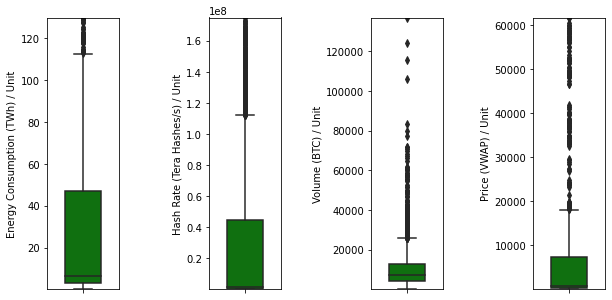

In [30]:
selection = ["Energy Consumption (TWh)", "Hash Rate (Tera Hashes/s)", "Volume (BTC)",
"Price (VWAP)"]

fig, axes = plt.subplots(1, len(selection), figsize=(10,5))

for i, col in enumerate(selection):
    ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], width=0.5, color="green")
    ax.set_ylim(df[col].min(), df[col].max())
    ax.set_ylabel(col + ' / Unit')

plt.subplots_adjust(wspace=1.25)
plt.show()

The box and whsiker plots denotes the *presence of outliers* for all feature columns. This is to be expected from the significant growth of BTC over the years.

### Checking skewness

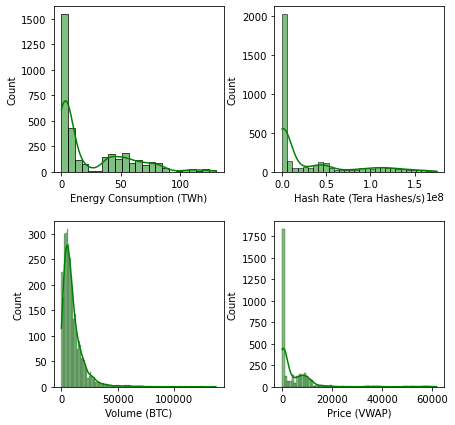

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(7,7))

sns.histplot(data=df, x="Energy Consumption (TWh)", kde=True, color="green", ax=axs[0, 0])
sns.histplot(data=df, x="Hash Rate (Tera Hashes/s)", kde=True, color="green", ax=axs[0, 1])
sns.histplot(data=df, x="Volume (BTC)", kde=True, color="green", ax=axs[1, 0])
sns.histplot(data=df, x="Price (VWAP)", kde=True, color="green", ax=axs[1, 1])

plt.subplots_adjust(wspace=.3, hspace=.3)

plt.show()

All feature variables are *right skewed/positively skewed*.

## Bivariate Analysis

### Checking for correlation between predictor variables

<AxesSubplot:>

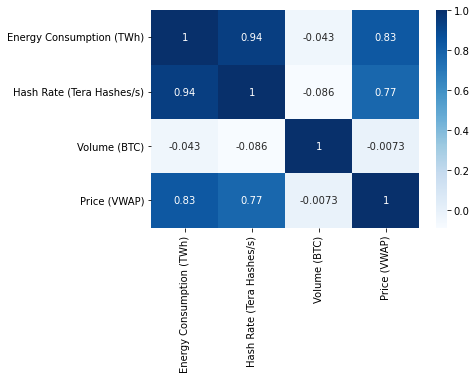

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(df[selection].corr(),cmap='Blues',annot=True) 

We can infer here that all variables except **Volume (BTC)** have *positively strong correlation* with each other. It may be safe to drop **Volume (BTC)** as it may not be an effective predictor for Carbon Footprint.

### Time-series graphs

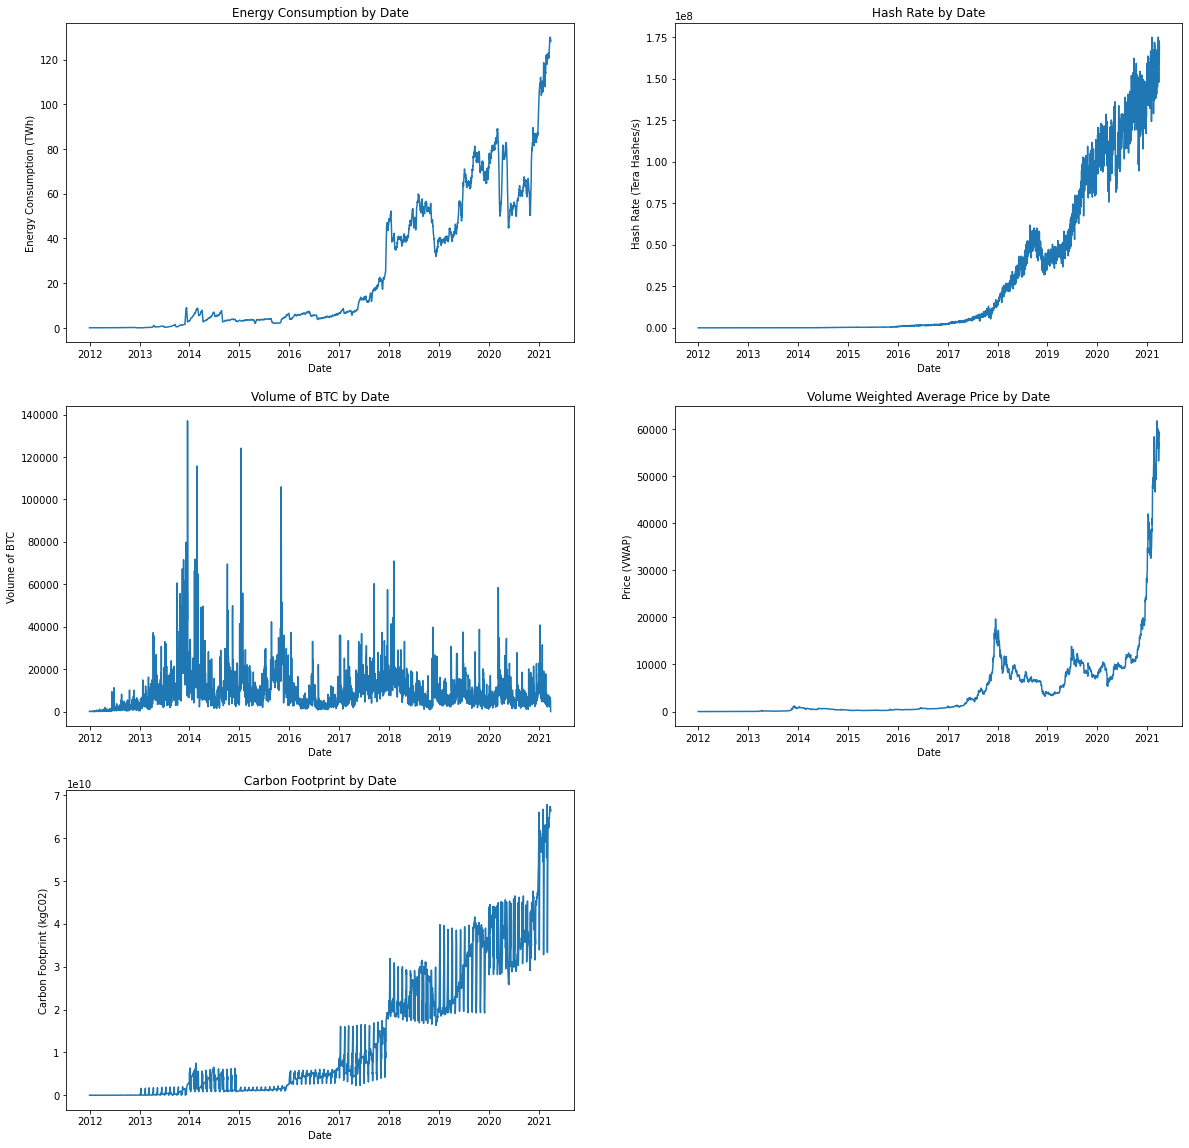

In [33]:
figure, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Plotting the time series of Energy Consumption
axis[0, 0].plot(df["Date"], df["Energy Consumption (TWh)"])
axis[0, 0].set_title("Energy Consumption by Date")
axis[0, 0].set_xlabel("Date")
axis[0, 0].set_ylabel("Energy Consumption (TWh)")

# Plotting the time series of Hash Rate
axis[0, 1].plot(df["Date"], df["Hash Rate (Tera Hashes/s)"])
axis[0, 1].set_title("Hash Rate by Date")
axis[0, 1].set_xlabel("Date")
axis[0, 1].set_ylabel("Hash Rate (Tera Hashes/s)")

# Plotting the time series of Volume (BTC)
axis[1, 0].plot(df["Date"], df["Volume (BTC)"])
axis[1, 0].set_title("Volume of BTC by Date")
axis[1, 0].set_xlabel("Date")
axis[1, 0].set_ylabel("Volume of BTC")

# Plotting the time series of Price (VWAP)
axis[1, 1].plot(df["Date"], df["Price (VWAP)"])
axis[1, 1].set_title("Volume Weighted Average Price by Date")
axis[1, 1].set_xlabel("Date")
axis[1, 1].set_ylabel("Price (VWAP)")

# Plotting the time series of Carbon Footprint (kgC02)
axis[2, 0].plot(df["Date"], df["Carbon Footprint (kgC02)"])
axis[2, 0].set_title("Carbon Footprint by Date")
axis[2, 0].set_xlabel("Date")
axis[2, 0].set_ylabel("Carbon Footprint (kgC02)")

axis[2,1].remove()
plt.show()

As seen in the time-series graphs, there is an uptrend. They show a pattern that is upward, except for the graph of Volume of BTC.
Since there is a trend in the trajectory of the variable over time, it is possible to use the Linear Regression Model to correlate Bitcoin's features to Bitcoin's generated carbon footprint.

# Creating the Linear Regression Model
A linear regression model will be used to determine the relationship of the Bitcoin's **Generated Carbon Footprint** to the Bitcoin's <**Energy consumption**, **Hash rate**, **Trade Volume**, and **Price**.

In [34]:
feature_cols = df[df.columns.difference(["Carbon Footprint (kgC02)", "Date"])].columns.values
X = df[feature_cols]
y = df['Carbon Footprint (kgC02)']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

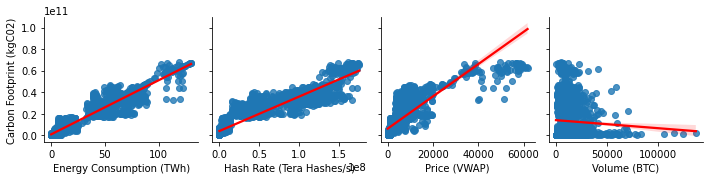

In [35]:
sns.pairplot(df, x_vars=feature_cols, y_vars='Carbon Footprint (kgC02)', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

After comparing the Generated Carbon Footprint and the features of Bitcoin, we have observed the following: 
<li> Bitcoin's Energy Consumption, Hash Rate, and Price are going in a positive direction while Volume is going in a negative direction</li>
<li> Bitcoin's Energy Consumption, and Hash Rate have a strong relationship with the Generated Carbon Footprint while Price has a weak relationship and Volume has no relationship at all. </li>
<li> Bitcoin's Energy Consumption, Hash Rate, and Price have a linear relationship with the Generated Carbon Footprint while Volume has no form or shape of relationship. </li>

## Model Validation

We compute for the model's performance metrics. The **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **Root Mean Squared Error (RMSE)**. We divide the RMSE by the mean of the actual Carbon Footprint generated to calculate for the **Scatter Index (SI)**. The SI is a normalized measure of error. Lower SI values denote better performance model. We also computed for the linear regression score of each predictor variables.

Energy Consumption (TWh)_MAE: 2114894537.8430164
Energy Consumption (TWh)_MSE: 1.3136735865718594e+19
Energy Consumption (TWh)_RMSE 3624463527.9884653
Energy Consumption (TWh)_SI 27.266807935986375
Energy Consumption (TWh)_Score 94.59%


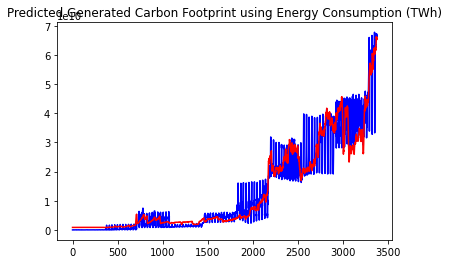

Hash Rate (Tera Hashes/s)_MAE: 4182118198.7396026
Hash Rate (Tera Hashes/s)_MSE: 3.089683501038239e+19
Hash Rate (Tera Hashes/s)_RMSE 5558492152.588001
Hash Rate (Tera Hashes/s)_SI 41.8164886383668
Hash Rate (Tera Hashes/s)_Score 87.28%


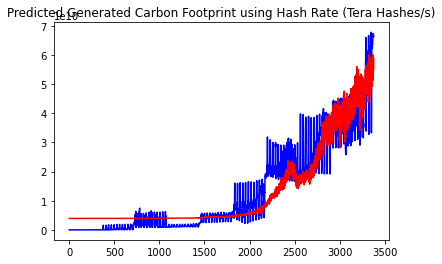

Price (VWAP)_MAE: 6969036811.729151
Price (VWAP)_MSE: 8.093982243077936e+19
Price (VWAP)_RMSE 8996656180.536154
Price (VWAP)_SI 67.68176703848039
Price (VWAP)_Score 66.68%


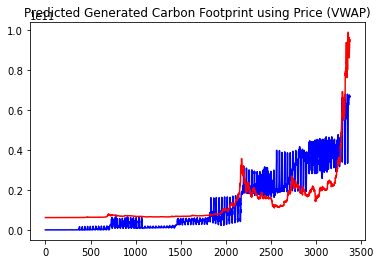

Volume (BTC)_MAE: 13254047395.047
Volume (BTC)_MSE: 2.423717456579845e+20
Volume (BTC)_RMSE 15568292959.023623
Volume (BTC)_SI 117.12013398034034
Volume (BTC)_Score 0.23%


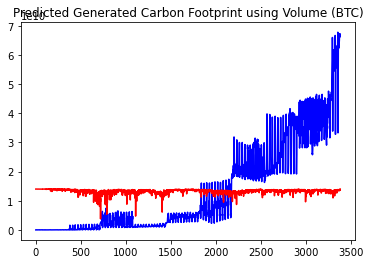

In [36]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.plot(range(len(y_test)), y_test, color='blue')
    plt.plot(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


feature_cols = df[df.columns.difference(["Carbon Footprint (kgC02)", "Date"])].columns.values
y = df['Carbon Footprint (kgC02)']
date = df['Date']
denom = y.mean()

for i in feature_cols:
    X = df[[i]]

    # instantiate and fit
    linreg = LinearRegression()
    linreg.fit(X, y)
    y_pred = linreg.predict(X)
    
    print(f"{i}_MAE: {metrics.mean_absolute_error(y, y_pred)}")
    print(f"{i}_MSE: {metrics.mean_squared_error(y, y_pred)}")
    print(f"{i}_RMSE {np.sqrt(metrics.mean_squared_error(y, y_pred))}")
    print(f"{i}_SI {(np.sqrt(metrics.mean_squared_error(y, y_pred))/denom) * 100}")
    print(f"{i}_Score {round((linreg.score(X,y) * 100),2)}%")
    plotGraph(y, y_pred, "Predicted Generated Carbon Footprint using " + str(i) )


# Results and Discussion

From our model validation, we have found that the **Energy Consumption (TWh)** is the best predictor for the generated Carbon Footprint with an SI of 27 and Linear regression score of 94.59%. This is to be expected as Energy Consumption really is a major source of pollution and greenhouse gases. We also found that **Hash rate (Tera hashes/s)** can be a good predictor. But, also note that increasing hash rates entail increase usage of machines which, in turn, consumes more energy. 

On the other hand, we see that **Price** is an adequate predictor with an SI and linear regression score of 67, and 66.68%, respectively. Moreover, **Volume** with SI and linear regression score of 117 and 0.23%, respectively is the worst predictor out of all variables. This is also consistent with our Exploratory Data Analysis as we have shown there that **Volume** have weak correlation between all other variables.